In [1]:
import os
import pandas as pd

root_dir = '../data/20_newsgroups'
categories = os.listdir(root_dir)

rows = []
for cat in categories:
    cat_path = os.path.join(root_dir, cat)
    if os.path.isdir(cat_path):
        for filename in os.listdir(cat_path):
            file_path = os.path.join(cat_path, filename)
            with open(file_path, 'r', encoding='latin-1', errors='ignore') as f:
                text = f.read()
            rows.append((text, cat))

df = pd.DataFrame(rows, columns=['text', 'label'])

In [2]:
df.head()

,text,label
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism


In [3]:
df['label'].value_counts()

label
alt.atheism                 1000
comp.graphics               1000
comp.os.ms-windows.misc     1000
comp.sys.ibm.pc.hardware    1000
comp.sys.mac.hardware       1000
comp.windows.x              1000
misc.forsale                1000
rec.autos                   1000
rec.motorcycles             1000
rec.sport.baseball          1000
rec.sport.hockey            1000
sci.crypt                   1000
sci.electronics             1000
sci.med                     1000
sci.space                   1000
talk.politics.guns          1000
talk.politics.misc          1000
talk.politics.mideast       1000
talk.religion.misc          1000
soc.religion.christian       997
Name: count, dtype: int64

In [4]:
df['text_length'] = df['text'].apply(lambda x: len(x.split()))
df['text_length'].describe()

count    19997.000000
mean       302.378807
std        510.959765
min         21.000000
25%        126.000000
50%        195.000000
75%        314.000000
max      11839.000000
Name: text_length, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         19997 non-null  object
 1   label        19997 non-null  object
 2   text_length  19997 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 468.8+ KB


In [6]:
df.isnull().sum()

text           0
label          0
text_length    0
dtype: int64

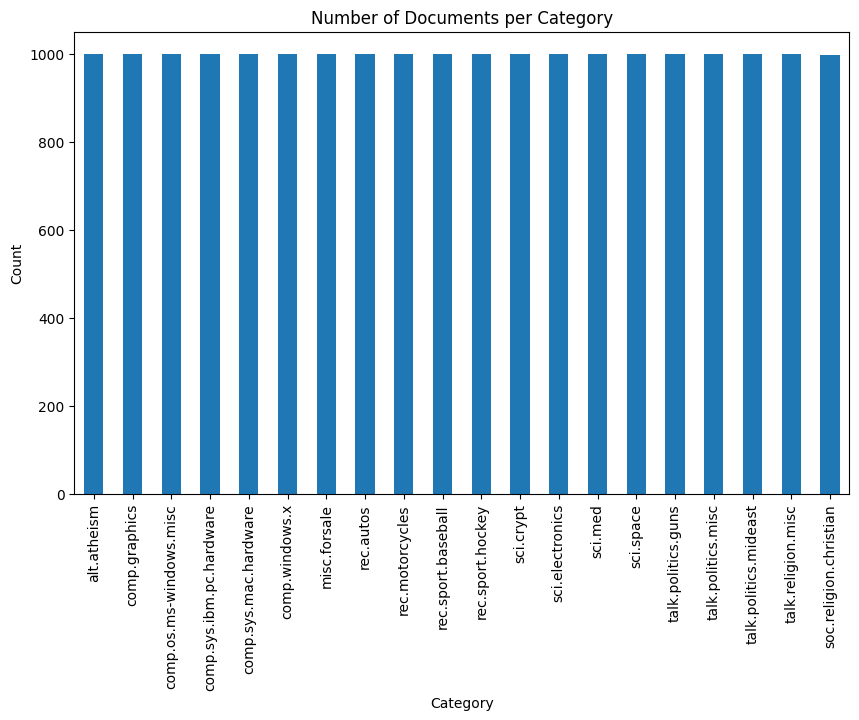

In [7]:
import matplotlib.pyplot as plt

label_counts = df['label'].value_counts()
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title("Number of Documents per Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

In [8]:
print(df.loc[0, 'text'])  # bài viết đầu tiên
print(df.loc[0, 'label']) # nhãn của bài viết

Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126
Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew
From: mathew <mathew@mantis.co.uk>
Newsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers
Subject: Alt.Atheism FAQ: Atheist Resources
Summary: Books, addresses, music -- anything related to atheism
Keywords: FAQ, atheism, books, music, fiction, addresses, contacts
Message-ID: <19930329115719@mantis.co.uk>
Date: Mon, 29 Mar 1993 11:57:19 GMT
Expires: Thu, 29 Apr 1993 11:57:19 GMT
Followup-To: alt.atheism
Distribution: world
Organization: Mantis Consultants, Cambridge. UK.
Approved: news-answers-request@mit.edu
Supersedes: <19930301143317@mantis.co.uk>
Lines: 290

Archive-name: atheism/resources
Alt-atheism-archive-name: resources
Last-modified: 11 December

# Phân tích từ vựng cơ bản

In [9]:
import re

df['tokens'] = df['text'].apply(lambda x: re.findall(r'\w+', x.lower()))

In [10]:
from collections import Counter

all_words = []
df['tokens'].apply(lambda x: all_words.extend(x))
word_freq = Counter(all_words)
print(word_freq.most_common(50))

[('the', 256554), ('edu', 164007), ('to', 133963), ('of', 122352), ('a', 111810), ('and', 102358), ('i', 92113), ('in', 87007), ('is', 75575), ('that', 70765), ('ax', 62416), ('it', 58816), ('cmu', 52409), ('for', 50392), ('com', 50158), ('you', 48181), ('cs', 45142), ('from', 39705), ('s', 38677), ('on', 35557), ('this', 34706), ('news', 34309), ('not', 33478), ('be', 33017), ('srv', 32359), ('are', 32241), ('t', 32114), ('have', 32002), ('with', 30225), ('as', 27875), ('1', 26135), ('cantaloupe', 26048), ('or', 25971), ('net', 25459), ('was', 24239), ('if', 24220), ('but', 23264), ('they', 23205), ('message', 21954), ('subject', 21589), ('lines', 20894), ('date', 20787), ('id', 20695), ('apr', 20510), ('newsgroups', 20404), ('path', 20369), ('can', 20028), ('organization', 19840), ('at', 19574), ('by', 19533)]


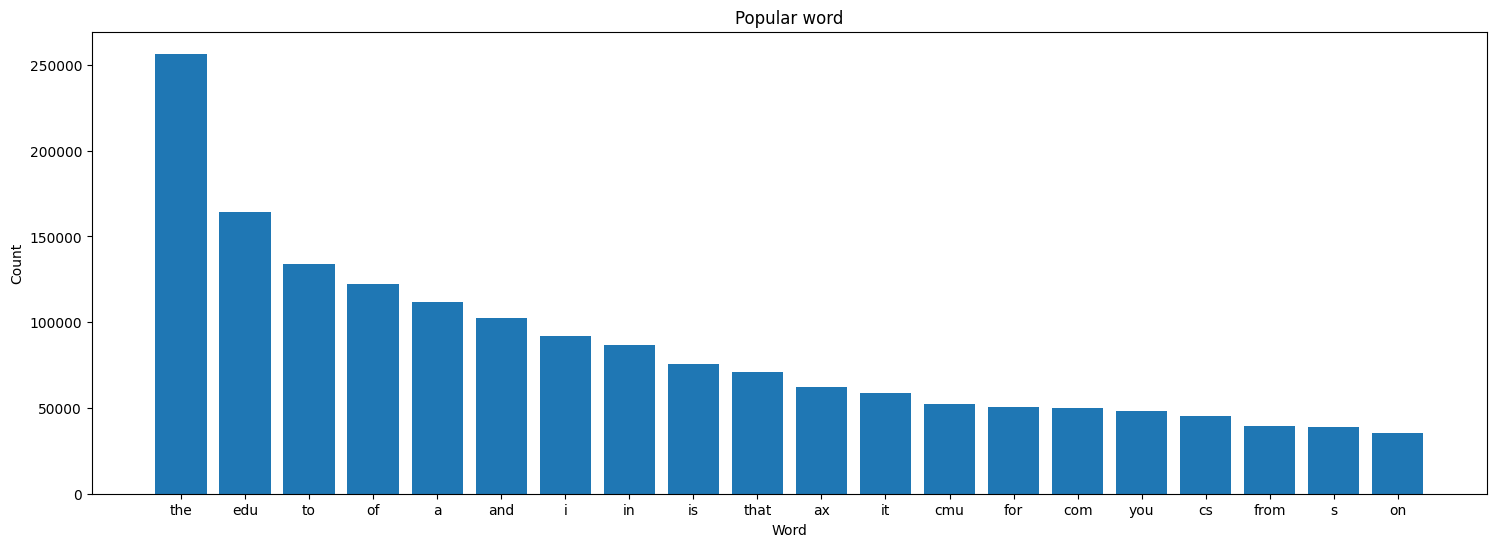

In [11]:
# Tách danh sách từ và số lần xuất hiện
words, counts = zip(*word_freq.most_common(20))

# Vẽ biểu đồ
plt.figure(figsize=(18, 6))
plt.bar(words, counts)
plt.title("Popular word")
plt.xlabel("Word")
plt.ylabel("Count")
plt.show()

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def load_raw_data(root_dir):
    """
    Duyệt qua thư mục raw data, đọc các file văn bản và gán nhãn dựa trên tên thư mục.
    
    Args:
        root_dir (str): Đường dẫn tới thư mục chứa các thư mục con của các nhãn.
    
    Returns:
        DataFrame: Chứa hai cột 'text' và 'label'.
    """
    categories = os.listdir(root_dir)

    rows = []
    for cat in categories:
        cat_path = os.path.join(root_dir, cat)
        if os.path.isdir(cat_path):
            for filename in os.listdir(cat_path):
                file_path = os.path.join(cat_path, filename)
                with open(file_path, 'r', encoding='latin-1', errors='ignore') as f:
                    text = f.read()
                rows.append((text, cat))

    df = pd.DataFrame(rows, columns=['text', 'label'])
    return df

def text_preprocess(text, stop_words, lemmatizer):
    """
    Tiền xử lý văn bản: chuyển về chữ thường, loại bỏ HTML, tokenization, loại bỏ stopwords và lemmatization.
    
    Args:
        text (str): Văn bản đầu vào.
        stop_words (set): Tập từ dừng.
        lemmatizer (WordNetLemmatizer): Đối tượng lemmatizer.
        
    Returns:
        str: Văn bản đã được xử lý.
    """
    # Chuyển thành chữ thường
    text = text.lower()
    # Loại bỏ HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Tách từ bằng regex (chỉ lấy các ký tự chữ và số, ở đây lấy cả chữ cái)
    tokens = re.findall(r'\w+', text)
    # Lọc: chỉ giữ những token chứa chữ cái và có độ dài > 1
    tokens = [token for token in tokens if token.isalpha() and len(token) > 1]
    # Loại bỏ stopwords
    tokens = [token for token in tokens if token not in stop_words]
    # Thực hiện lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

def preprocess_data(df):
    """
    Áp dụng tiền xử lý cho cột 'text' trong DataFrame.
    
    Args:
        df (DataFrame): Dữ liệu thô.
    
    Returns:
        DataFrame: Dữ liệu sau khi xử lý, thêm cột 'clean_text'.
    """
    # Tải stopwords và wordnet (nếu chưa có)
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)
    
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    df['clean_text'] = df['text'].apply(lambda x: text_preprocess(x, stop_words, lemmatizer))
    return df

def main():
    # Đường dẫn đến dữ liệu raw và nơi lưu dữ liệu đã xử lý
    root_dir = '../data/20_newsgroups'
    output_file = '../data/processed/20news_processed.csv'
    
    print("Loading raw data...")
    df = load_raw_data(root_dir)
    print(f"Raw data loaded. Shape: {df.shape}")
    
    print("Starting text preprocessing...")
    df = preprocess_data(df)
    print("Preprocessing complete. Sample processed text:")
    print(df[['clean_text', 'label']].head())
    
    # Tạo thư mục processed nếu chưa có
    os.makedirs(os.path.dirname(output_file), exist_ok=True)
    
    # Lưu dữ liệu đã xử lý
    df[['clean_text', 'label']].to_csv(output_file, index=False)
    print(f"Processed data saved to: {output_file}")

if __name__ == '__main__':
    main()

# import os
# data_path = "data/20_newsgroups"
# if os.path.exists(data_path):
#     print(f"Directory '{data_path}' exists.")
# else:
#     print(f"Directory '{data_path}' does NOT exist.")


Loading raw data...
Raw data loaded. Shape: (19997, 2)
Starting text preprocessing...
Preprocessing complete. Sample processed text:
                                          clean_text        label
0  xref cantaloupe srv c cmu edu alt atheism alt ...  alt.atheism
1  xref cantaloupe srv c cmu edu alt atheism alt ...  alt.atheism
2  newsgroups alt atheism path cantaloupe srv c c...  alt.atheism
3  xref cantaloupe srv c cmu edu alt atheism alt ...  alt.atheism
4  xref cantaloupe srv c cmu edu alt atheism soc ...  alt.atheism
Processed data saved to: ../data/processed/20news_processed.csv
